<a href="https://colab.research.google.com/github/gtsagkatakis/OptimizationMethods_2024/blob/main/Lasso_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
n_samples = 100
n_features = 100
n_informative = 10  # Only 10 features are informative
noise = 0.1  # Small amount of noise

X, y, coef_true = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    noise=noise,
    coef=True,
    random_state=42
)

# Standardize the feature matrix for better convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Initialize parameters
n_samples, n_features = X.shape
n_iterations = 1000
alpha = 0.001  # Learning rate
lmbda = 0.1  # Regularization value
w = np.zeros(n_features)  # Initialize weights
objective_values = []
l2_error=[]

# Subgradient Descent Loop
for iteration in range(n_iterations):
    # Compute gradients
    grad_ls = -2 * X.T @ (y - X @ w)  # Gradient of the least squares term
    #grad_l1 =    # Subgradient of the L1 term

    # Update weights
    subgrad = grad_ls
    w -= alpha * subgrad

    # Compute objective value
    obj_value = np.linalg.norm(y - X @ w)**2 + lmbda * np.sum(np.abs(w))
    objective_values.append(obj_value)
    l2_err=np.linalg.norm(y - X @ w)**2
    l2_error.append(l2_err)

    # Print progress every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Objective Value: {obj_value:.4f}, L2 error: {l2_err:.4f}")


Iteration 0, Objective Value: 741848.0645, L2 error: 741562.9510
Iteration 100, Objective Value: 2191.5972, L2 error: 1671.8650
Iteration 200, Objective Value: 936.0485, L2 error: 456.9466
Iteration 300, Objective Value: 662.4001, L2 error: 204.8728
Iteration 400, Objective Value: 555.6295, L2 error: 111.4995
Iteration 500, Objective Value: 501.3475, L2 error: 67.1814
Iteration 600, Objective Value: 468.9071, L2 error: 43.0734
Iteration 700, Objective Value: 446.6254, L2 error: 28.4763
Iteration 800, Objective Value: 430.9432, L2 error: 19.4969
Iteration 900, Objective Value: 418.7767, L2 error: 13.5540


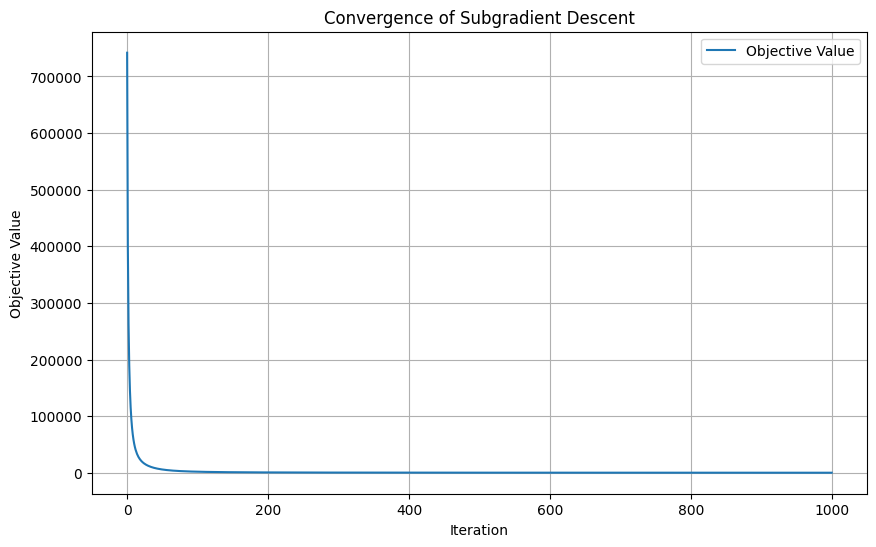

In [23]:
import matplotlib.pyplot as plt

# Plot the convergence of the objective value
plt.figure(figsize=(10, 6))
plt.plot(objective_values, label="Objective Value")
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.title("Convergence of Subgradient Descent")
plt.legend()
plt.grid()
plt.show()


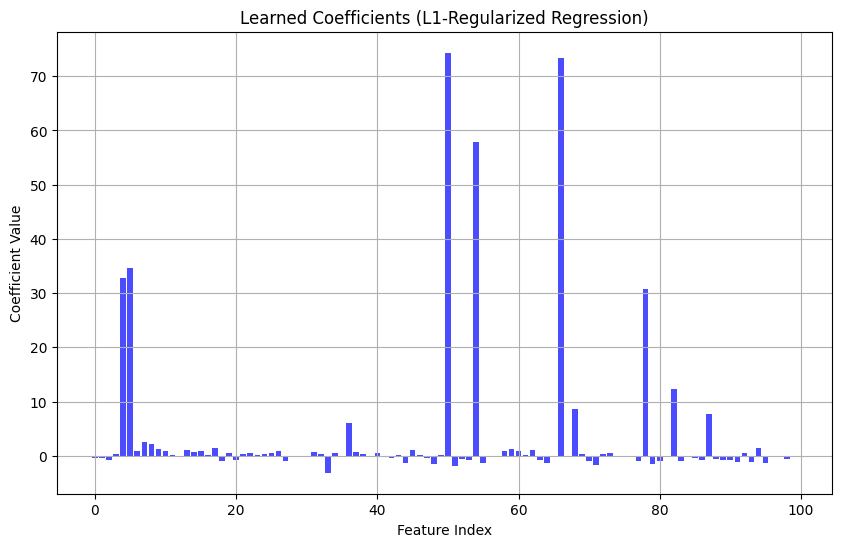

In [24]:
# Plot learned coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(w)), w, color='blue', alpha=0.7)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Learned Coefficients (L1-Regularized Regression)")
plt.grid()
plt.show()

